# Data Visualization Project
## Football players in the top 5 leauges in Europe

In this project I'm going to analyse data from football players in the top 5 leauges in Europe season 22-23, to find potential signings for an imagine club. The data is collected from FBRef with pandas read_html-function.

## Preparations

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import flagpy as fp
import scipy.stats as stats
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.colors import Normalize

### Creating a list of all data that I want to get from FBRef

In [2]:
lst_of_stats = ['stats', 'shooting', 'passing','defense'] #'passing_types', 'gca', 'possession', 'playingtime']

### Importing all data with Pandas read_html

In [3]:
lst_of_df = []
for stat in lst_of_stats:
    url = f'https://fbref.com/en/comps/Big5/2022-2023/{stat}/players/2022-2023-Big-5-European-Leagues-Stats'
    df_name = f'df_{stat}'
    exec(f'{df_name} = pd.read_html("{url}")[0]')
    exec(f'lst_of_df.append({df_name})')

### First visual observation of data

In [4]:
for df in lst_of_df:
    
    display(df.head(30))

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Player             Nation   
0                   1   Brenden Aaronson             us USA   
1                   2    Paxten Aaronson             us USA   
2                   3     James Abankwah             ie IRL   
3                   4      George Abbott            eng ENG   
4                   5   Yunis Abdelhamid             ma MAR   
5                   6      Himad Abdelli             dz ALG   
6                   7  Salis Abdul Samed             gh GHA   
7                   8    Laurent Abergel             fr FRA   
8                   9  Oliver Abildgaard             dk DEN   
9                  10     Matthis Abline             fr FRA   
10                 11     Matthis Abline             fr FRA   
11                 12              Abner             br BRA   
12                 13  Zakaria Aboukhlal             ma MAR   
13                 14      Tammy Abraham            eng ENG   
14                 15   Christian Acella             it ITA   
15                 16   Francesco Acerbi             it ITA   
16                 17      Álvaro Aceves             es ESP   
17                 18       Mohamed Achi             fr FRA   
18                 19       Marcos Acuña             ar ARG   
19                 20          Che Adams            sct SCO   
20                 21        Tyler Adams             us USA   
21                 22     Sargis Adamyan             am ARM   
22                 23   Tosin Adarabioyo            eng ENG   
23                 24     Martin Adeline             fr FRA   
24                 25      Karim Adeyemi             de GER   
25                 Rk             Player             Nation   
26                 26         Amine Adli             ma MAR   
27                 27        Yacine Adli             fr FRA   
28                 28   Michel Aebischer             ch SUI   
29                 29   Felix Afena-Gyan             gh GHA   

   Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                  Pos              Squad                Comp   
0               MF,FW       Leeds United  eng Premier League   
1               MF,DF     Eint Frankfurt       de Bundesliga   
2                  DF            Udinese          it Serie A   
3                  MF          Tottenham  eng Premier League   
4                  DF              Reims          fr Ligue 1   
5               MF,FW             Angers          fr Ligue 1   
6                  MF               Lens          fr Ligue 1   
7                  MF            Lorient          fr Ligue 1   
8                  MF      Hellas Verona          it Serie A   
9               FW,MF            Auxerre          fr Ligue 1   
10              FW,MF             Rennes          fr Ligue 1   
11                 DF              Betis          es La Liga   
12              FW,MF           Toulouse          fr Ligue 1   
13                 FW               Roma          it Serie A   
14                 MF          Cremonese          it Serie A   
15                 DF              Inter          it Serie A   
16                 GK         Valladolid          es La Liga   
17                 FW             Nantes          fr Ligue 1   
18                 DF            Sevilla          es La Liga   
19                 FW        Southampton  eng Premier League   
20                 MF       Leeds United  eng Premier League   
21              FW,MF               Köln       de Bundesliga   
22                 DF             Fulham  eng Premier League   
23              MF,FW              Reims          fr Ligue 1   
24              FW,MF           Dortmund       de Bundesliga   
25                Pos              Squad                Comp   
26              FW,MF         Leverkusen       de Bundesliga   
27              MF,FW              Milan          it Serie A   
28              FW,MF            Bologna          it Serie A   
29

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Player             Nation   
0                   1   Brenden Aaronson             us USA   
1                   2    Paxten Aaronson             us USA   
2                   3     James Abankwah             ie IRL   
3                   4      George Abbott            eng ENG   
4                   5   Yunis Abdelhamid             ma MAR   
5                   6      Himad Abdelli             dz ALG   
6                   7  Salis Abdul Samed             gh GHA   
7                   8    Laurent Abergel             fr FRA   
8                   9  Oliver Abildgaard             dk DEN   
9                  10     Matthis Abline             fr FRA   
10                 11     Matthis Abline             fr FRA   
11                 12              Abner             br BRA   
12                 13  Zakaria Aboukhlal             ma MAR   
13                 14      Tammy Abraham            eng ENG   
14                 15   Christian Acella             it ITA   
15                 16   Francesco Acerbi             it ITA   
16                 17      Álvaro Aceves             es ESP   
17                 18       Mohamed Achi             fr FRA   
18                 19       Marcos Acuña             ar ARG   
19                 20          Che Adams            sct SCO   
20                 21        Tyler Adams             us USA   
21                 22     Sargis Adamyan             am ARM   
22                 23   Tosin Adarabioyo            eng ENG   
23                 24     Martin Adeline             fr FRA   
24                 25      Karim Adeyemi             de GER   
25                 Rk             Player             Nation   
26                 26         Amine Adli             ma MAR   
27                 27        Yacine Adli             fr FRA   
28                 28   Michel Aebischer             ch SUI   
29                 29   Felix Afena-Gyan             gh GHA   

   Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                  Pos              Squad                Comp   
0               MF,FW       Leeds United  eng Premier League   
1               MF,DF     Eint Frankfurt       de Bundesliga   
2                  DF            Udinese          it Serie A   
3                  MF          Tottenham  eng Premier League   
4                  DF              Reims          fr Ligue 1   
5               MF,FW             Angers          fr Ligue 1   
6                  MF               Lens          fr Ligue 1   
7                  MF            Lorient          fr Ligue 1   
8                  MF      Hellas Verona          it Serie A   
9               FW,MF            Auxerre          fr Ligue 1   
10              FW,MF             Rennes          fr Ligue 1   
11                 DF              Betis          es La Liga   
12              FW,MF           Toulouse          fr Ligue 1   
13                 FW               Roma          it Serie A   
14                 MF          Cremonese          it Serie A   
15                 DF              Inter          it Serie A   
16                 GK         Valladolid          es La Liga   
17                 FW             Nantes          fr Ligue 1   
18                 DF            Sevilla          es La Liga   
19                 FW        Southampton  eng Premier League   
20                 MF       Leeds United  eng Premier League   
21              FW,MF               Köln       de Bundesliga   
22                 DF             Fulham  eng Premier League   
23              MF,FW              Reims          fr Ligue 1   
24              FW,MF           Dortmund       de Bundesliga   
25                Pos              Squad                Comp   
26              FW,MF         Leverkusen       de Bundesliga   
27              MF,FW              Milan          it Serie A   
28              FW,MF            Bologna          it Serie A   
29

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Player             Nation   
0                   1   Brenden Aaronson             us USA   
1                   2    Paxten Aaronson             us USA   
2                   3     James Abankwah             ie IRL   
3                   4      George Abbott            eng ENG   
4                   5   Yunis Abdelhamid             ma MAR   
5                   6      Himad Abdelli             dz ALG   
6                   7  Salis Abdul Samed             gh GHA   
7                   8    Laurent Abergel             fr FRA   
8                   9  Oliver Abildgaard             dk DEN   
9                  10     Matthis Abline             fr FRA   
10                 11     Matthis Abline             fr FRA   
11                 12              Abner             br BRA   
12                 13  Zakaria Aboukhlal             ma MAR   
13                 14      Tammy Abraham            eng ENG   
14                 15   Christian Acella             it ITA   
15                 16   Francesco Acerbi             it ITA   
16                 17      Álvaro Aceves             es ESP   
17                 18       Mohamed Achi             fr FRA   
18                 19       Marcos Acuña             ar ARG   
19                 20          Che Adams            sct SCO   
20                 21        Tyler Adams             us USA   
21                 22     Sargis Adamyan             am ARM   
22                 23   Tosin Adarabioyo            eng ENG   
23                 24     Martin Adeline             fr FRA   
24                 25      Karim Adeyemi             de GER   
25                 Rk             Player             Nation   
26                 26         Amine Adli             ma MAR   
27                 27        Yacine Adli             fr FRA   
28                 28   Michel Aebischer             ch SUI   
29                 29   Felix Afena-Gyan             gh GHA   

   Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                  Pos              Squad                Comp   
0               MF,FW       Leeds United  eng Premier League   
1               MF,DF     Eint Frankfurt       de Bundesliga   
2                  DF            Udinese          it Serie A   
3                  MF          Tottenham  eng Premier League   
4                  DF              Reims          fr Ligue 1   
5               MF,FW             Angers          fr Ligue 1   
6                  MF               Lens          fr Ligue 1   
7                  MF            Lorient          fr Ligue 1   
8                  MF      Hellas Verona          it Serie A   
9               FW,MF            Auxerre          fr Ligue 1   
10              FW,MF             Rennes          fr Ligue 1   
11                 DF              Betis          es La Liga   
12              FW,MF           Toulouse          fr Ligue 1   
13                 FW               Roma          it Serie A   
14                 MF          Cremonese          it Serie A   
15                 DF              Inter          it Serie A   
16                 GK         Valladolid          es La Liga   
17                 FW             Nantes          fr Ligue 1   
18                 DF            Sevilla          es La Liga   
19                 FW        Southampton  eng Premier League   
20                 MF       Leeds United  eng Premier League   
21              FW,MF               Köln       de Bundesliga   
22                 DF             Fulham  eng Premier League   
23              MF,FW              Reims          fr Ligue 1   
24              FW,MF           Dortmund       de Bundesliga   
25                Pos              Squad                Comp   
26              FW,MF         Leverkusen       de Bundesliga   
27              MF,FW              Milan          it Serie A   
28              FW,MF            Bologna          it Serie A   
29

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                   Rk             Player             Nation   
0                   1   Brenden Aaronson             us USA   
1                   2    Paxten Aaronson             us USA   
2                   3     James Abankwah             ie IRL   
3                   4      George Abbott            eng ENG   
4                   5   Yunis Abdelhamid             ma MAR   
5                   6      Himad Abdelli             dz ALG   
6                   7  Salis Abdul Samed             gh GHA   
7                   8    Laurent Abergel             fr FRA   
8                   9  Oliver Abildgaard             dk DEN   
9                  10     Matthis Abline             fr FRA   
10                 11     Matthis Abline             fr FRA   
11                 12              Abner             br BRA   
12                 13  Zakaria Aboukhlal             ma MAR   
13                 14      Tammy Abraham            eng ENG   
14                 15   Christian Acella             it ITA   
15                 16   Francesco Acerbi             it ITA   
16                 17      Álvaro Aceves             es ESP   
17                 18       Mohamed Achi             fr FRA   
18                 19       Marcos Acuña             ar ARG   
19                 20          Che Adams            sct SCO   
20                 21        Tyler Adams             us USA   
21                 22     Sargis Adamyan             am ARM   
22                 23   Tosin Adarabioyo            eng ENG   
23                 24     Martin Adeline             fr FRA   
24                 25      Karim Adeyemi             de GER   
25                 Rk             Player             Nation   
26                 26         Amine Adli             ma MAR   
27                 27        Yacine Adli             fr FRA   
28                 28   Michel Aebischer             ch SUI   
29                 29   Felix Afena-Gyan             gh GHA   

   Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                  Pos              Squad                Comp   
0               MF,FW       Leeds United  eng Premier League   
1               MF,DF     Eint Frankfurt       de Bundesliga   
2                  DF            Udinese          it Serie A   
3                  MF          Tottenham  eng Premier League   
4                  DF              Reims          fr Ligue 1   
5               MF,FW             Angers          fr Ligue 1   
6                  MF               Lens          fr Ligue 1   
7                  MF            Lorient          fr Ligue 1   
8                  MF      Hellas Verona          it Serie A   
9               FW,MF            Auxerre          fr Ligue 1   
10              FW,MF             Rennes          fr Ligue 1   
11                 DF              Betis          es La Liga   
12              FW,MF           Toulouse          fr Ligue 1   
13                 FW               Roma          it Serie A   
14                 MF          Cremonese          it Serie A   
15                 DF              Inter          it Serie A   
16                 GK         Valladolid          es La Liga   
17                 FW             Nantes          fr Ligue 1   
18                 DF            Sevilla          es La Liga   
19                 FW        Southampton  eng Premier League   
20                 MF       Leeds United  eng Premier League   
21              FW,MF               Köln       de Bundesliga   
22                 DF             Fulham  eng Premier League   
23              MF,FW              Reims          fr Ligue 1   
24              FW,MF           Dortmund       de Bundesliga   
25                Pos              Squad                Comp   
26              FW,MF         Leverkusen       de Bundesliga   
27              MF,FW              Milan          it Serie A   
28              FW,MF            Bologna          it Serie A   
29

In [5]:
for df in lst_of_df:
    
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)        3004 non-null   object
 1   (Unnamed: 1_level_0, Player)    3004 non-null   object
 2   (Unnamed: 2_level_0, Nation)    3001 non-null   object
 3   (Unnamed: 3_level_0, Pos)       3004 non-null   object
 4   (Unnamed: 4_level_0, Squad)     3004 non-null   object
 5   (Unnamed: 5_level_0, Comp)      3004 non-null   object
 6   (Unnamed: 6_level_0, Age)       3004 non-null   object
 7   (Unnamed: 7_level_0, Born)      3004 non-null   object
 8   (Playing Time, MP)              3004 non-null   object
 9   (Playing Time, Starts)          3004 non-null   object
 10  (Playing Time, Min)             3004 non-null   object
 11  (Playing Time, 90s)             3004 non-null   object
 12  (Performance, Gls)              3004 non-null   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)        3004 non-null   object
 1   (Unnamed: 1_level_0, Player)    3004 non-null   object
 2   (Unnamed: 2_level_0, Nation)    3001 non-null   object
 3   (Unnamed: 3_level_0, Pos)       3004 non-null   object
 4   (Unnamed: 4_level_0, Squad)     3004 non-null   object
 5   (Unnamed: 5_level_0, Comp)      3004 non-null   object
 6   (Unnamed: 6_level_0, Age)       3004 non-null   object
 7   (Unnamed: 7_level_0, Born)      3004 non-null   object
 8   (Unnamed: 8_level_0, 90s)       3004 non-null   object
 9   (Standard, Gls)                 3004 non-null   object
 10  (Standard, Sh)                  3004 non-null   object
 11  (Standard, SoT)                 3004 non-null   object
 12  (Standard, SoT%)                2476 non-null   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)        3004 non-null   object
 1   (Unnamed: 1_level_0, Player)    3004 non-null   object
 2   (Unnamed: 2_level_0, Nation)    3001 non-null   object
 3   (Unnamed: 3_level_0, Pos)       3004 non-null   object
 4   (Unnamed: 4_level_0, Squad)     3004 non-null   object
 5   (Unnamed: 5_level_0, Comp)      3004 non-null   object
 6   (Unnamed: 6_level_0, Age)       3004 non-null   object
 7   (Unnamed: 7_level_0, Born)      3004 non-null   object
 8   (Unnamed: 8_level_0, 90s)       3004 non-null   object
 9   (Total, Cmp)                    3001 non-null   object
 10  (Total, Att)                    3001 non-null   object
 11  (Total, Cmp%)                   2977 non-null   object
 12  (Total, TotDist)                3001 non-null   

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   (Unnamed: 0_level_0, Rk)        3004 non-null   object
 1   (Unnamed: 1_level_0, Player)    3004 non-null   object
 2   (Unnamed: 2_level_0, Nation)    3001 non-null   object
 3   (Unnamed: 3_level_0, Pos)       3004 non-null   object
 4   (Unnamed: 4_level_0, Squad)     3004 non-null   object
 5   (Unnamed: 5_level_0, Comp)      3004 non-null   object
 6   (Unnamed: 6_level_0, Age)       3004 non-null   object
 7   (Unnamed: 7_level_0, Born)      3004 non-null   object
 8   (Unnamed: 8_level_0, 90s)       3004 non-null   object
 9   (Tackles, Tkl)                  3001 non-null   object
 10  (Tackles, TklW)                 3004 non-null   object
 11  (Tackles, Def 3rd)              3001 non-null   object
 12  (Tackles, Mid 3rd)              3001 non-null   

None

## Cleaning Data

### Changing multi-index columns to single and cleaning up their names

In [6]:
def rename(x):
    if 'Unnamed' in x[0]:
        return x[1]
    else: 
        return x[0] + '_' + x[1]
    """
    if x[0] == 'Per 90 Minutes':
        return 'p90m_' + x[1]
    elif x[0] in ['Total','Short','Medium','Long']:
        return x[0] + '_' + x[1]
    else:
        return x[1]"""

for df in lst_of_df:
    df.columns = df.columns.map(rename)
 

### Dropping unessescary columns

In [7]:
for df in lst_of_df:
    df.drop(columns = ['Rk', 'Matches'], inplace = True)

### Removing every 25th rows that include table headers

In [8]:
for df in lst_of_df:
    df.drop(df.iloc[25::26].index, inplace = True)
    df.reset_index(drop = True, inplace = True)

### Drop rows with NaN values

In [9]:
for df in lst_of_df:
    df.dropna(inplace = True)
    df.reset_index(drop = True, inplace = True)

### Change Nation columns from us USA to USA and Comp from eng Premier League to Premier League

In [10]:
def leauge_name(x):
    a = x
    for i, letter in enumerate(x):
        if letter.isupper() and i != 0:
            return x[i-1:]
    return x   

for df in lst_of_df:
    df['Nation'] = df['Nation'].str.split(' ').str[1]
    df['Comp'] = df['Comp'].apply(leauge_name)

### Turn all numbers to floats instead of strings

In [11]:
for df in lst_of_df:
    for column in df.columns:
        array = np.array(df[column].str.replace('.', ''))
        if np.all(np.char.isnumeric(array.astype(str))):
            df[column] = pd.to_numeric(df[column], errors='coerce')

## EDA to get some insights into the data

### Plotting players who scored more than 5 goals

In [12]:
plt.rcParams["font.family"] = "Helvetica Neue"
sns.set_style("darkgrid")

In [13]:
df_shooting_plot = df_shooting.copy()
df_shooting_plot['Minutes Played'] = df_shooting_plot['90s']*90
df_shooting_plot['Goals'] = df_shooting_plot['Standard_Gls']

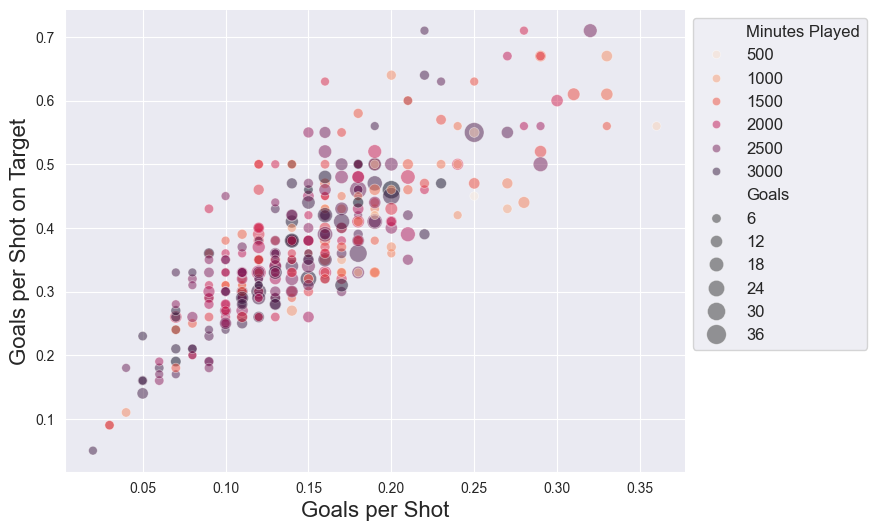

In [14]:
fig = plt.figure(figsize = (8,6))
sns.color_palette("rocket_r", as_cmap=True)
sns.scatterplot(data = df_shooting_plot.loc[(df_shooting_plot['Standard_Gls'] >= 5)], 
                x = 'Standard_G/Sh', y = 'Standard_G/SoT',
                size = 'Goals', hue = 'Minutes Played', alpha=.5, sizes=(40,200), palette = "rocket_r")

plt.ylabel(ylabel = 'Goals per Shot on Target', fontsize = 16)
plt.xlabel(xlabel = 'Goals per Shot', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize = 12)

plt.savefig('Players_Goals.png', dpi=600, transparent=False, bbox_inches='tight', 
            format='png')
sns.despine()
plt.show()


### Plotting players under the age of 25 and more than 15 goals, with good efficieny

In [15]:
df_shooting_possible = df_shooting.loc[(df_shooting['Standard_G/Sh'] >= 0.15) & (df_shooting['Standard_Gls'] >= 15) & (df_shooting['Standard_G/SoT'] >= 0.4) & (df_shooting.Age <= 24)].reset_index(drop = True)
df_shooting_possible['Minutes Played'] = df_shooting_possible['90s']*90
df_shooting_possible['Goals'] = df_shooting_possible['Standard_Gls']


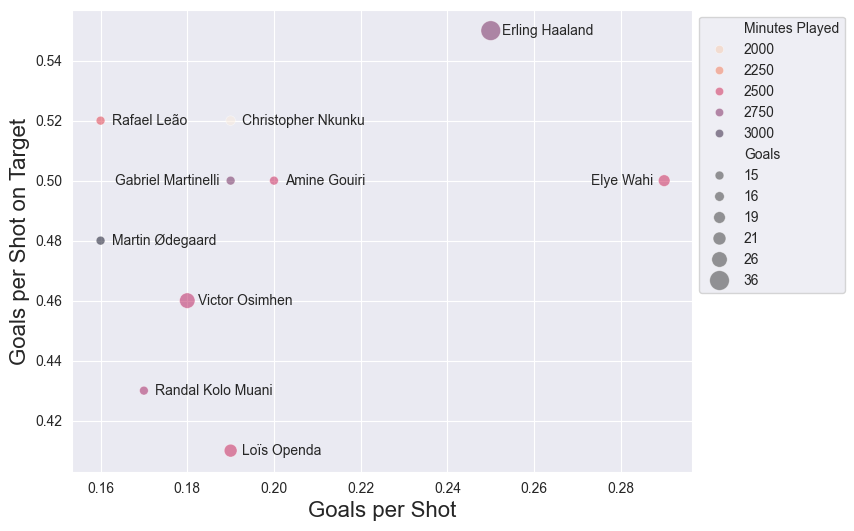

In [16]:
plt.figure(figsize =(8,6))

sns.scatterplot(data = df_shooting_possible, x = 'Standard_G/Sh', y = 'Standard_G/SoT',
                size = 'Goals', hue = 'Minutes Played', alpha=.5, sizes=(40,200), palette = "rocket_r")

for index, row in df_shooting_possible.iterrows():
    if row['Player'] in ['Elye Wahi', 'Gabriel Martinelli']:
        plt.annotate(row['Player'], (row['Standard_G/Sh'], row['Standard_G/SoT']), textcoords="offset points", 
                 xytext=(-8, 0), ha='right', va='center')
    else:
        plt.annotate(row['Player'], (row['Standard_G/Sh'], row['Standard_G/SoT']), textcoords="offset points", 
                     xytext=(8, 0), ha='left', va='center')
plt.ylabel(ylabel = 'Goals per Shot on Target', fontsize = 16)
plt.xlabel(xlabel = 'Goals per Shot', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Young_Players_Goals.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()

### Doing the same with playmakers, plotting all players passing stats

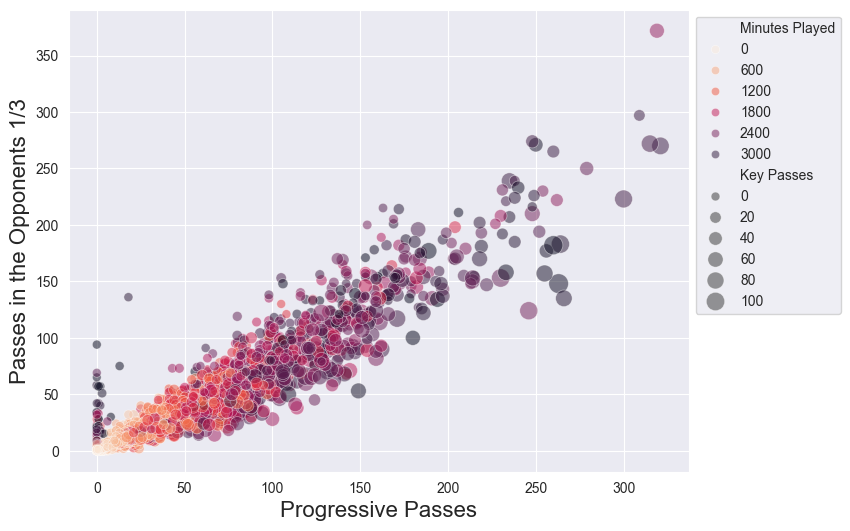

In [17]:
df_passing_plot = df_passing.copy()
df_passing_plot['Minutes Played'] = df_passing_plot['90s']*90
df_passing_plot['Key Passes'] = df_passing_plot['KP']

plt.figure(figsize = (8,6))
sns.scatterplot(data = df_passing_plot, x = 'PrgP', y = '1/3',
                size = 'Key Passes', hue = 'Minutes Played', alpha=.5, sizes=(40,200), palette = "rocket_r")

plt.ylabel(ylabel = 'Passes in the Opponents 1/3', fontsize = 16)
plt.xlabel(xlabel = 'Progressive Passes', fontsize = 16)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Players_pass.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()

### Players under the age of 25 with great passing stats

In [21]:
df_passing_possible = df_passing_plot.loc[(df_passing_plot['PrgP'] >= 200) & (df_passing_plot['1/3'] >= 180) & (df_passing_plot['Age'] <= 24) & (df_passing_plot['KP'] >= 20)]
df_passing_possible.loc[:,'Minutes Played'] = df_passing_possible['Minutes Played'].astype(int)

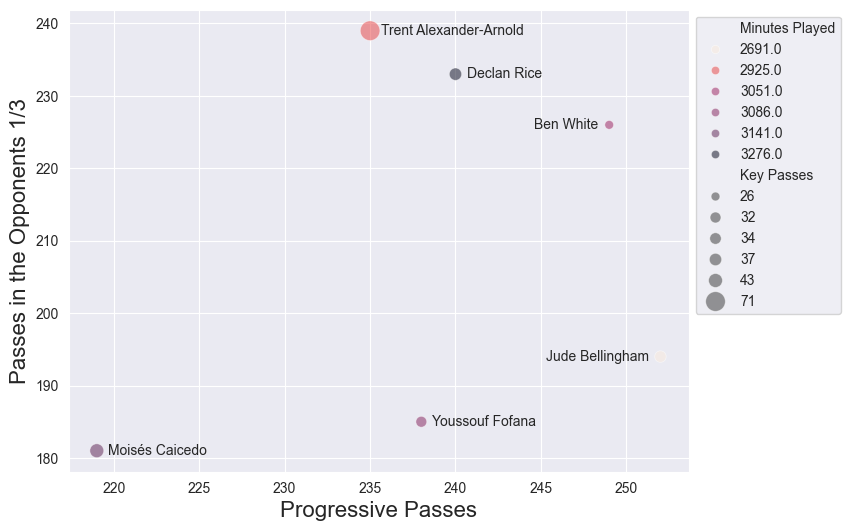

In [22]:
plt.figure(figsize =(8,6))
sns.scatterplot(data = df_passing_possible, x = 'PrgP', y = '1/3',
                size = 'Key Passes', hue = 'Minutes Played', alpha=.5, sizes=(40,200), palette = "rocket_r")
for index, row in df_passing_possible.iterrows():
    if row['Player'] in ['Jude Bellingham', 'Ben White']:
        plt.annotate(row['Player'], (row['PrgP'], row['1/3']), textcoords="offset points", 
                 xytext=(-8, 0), ha='right', va='center')
    elif row['Player'] == 'Maxime Lopez':
        plt.annotate(row['Player'], (row['PrgP'], row['1/3']), textcoords="offset points", 
                 xytext=(5, 0), ha='left', va='top')
    else:
        plt.annotate(row['Player'], (row['PrgP'], row['1/3']), textcoords="offset points", 
                    xytext=(8,0), ha='left', va='center')
        
plt.ylabel(ylabel = 'Passes in the Opponents 1/3', fontsize = 16)
plt.xlabel(xlabel = 'Progressive Passes', fontsize = 16)
#plt.title(label = 'Young Players who Scored More Than 15 Goals Last Season\n', fontsize = 20)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Young_players_pass.png', dpi=600, transparent=False, bbox_inches='tight', format='png')
plt.show()    

### Taking the players from the scroing grapgh, and calculates goals per ecpected goals, and then plots it

In [23]:
df_shooting_possible['G_per_xG'] = df_shooting_possible['Standard_Gls'].div(df_shooting_possible['Expected_xG'])

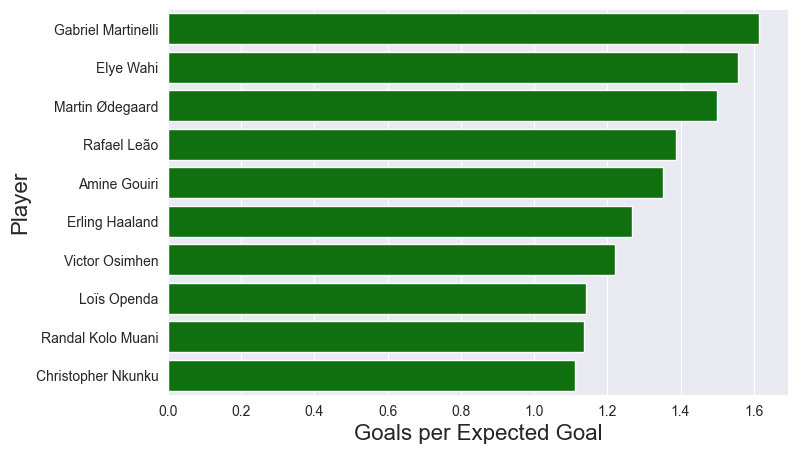

In [25]:
plt.figure(figsize = (8,5))
ax = sns.barplot(data = df_shooting_possible.sort_values(by = 'G_per_xG', ascending = False),
            y = 'Player', x = 'G_per_xG', color = 'green')
plt.xlabel(xlabel = 'Goals per Expected Goal', fontsize = 16)
plt.ylabel(ylabel = 'Player', fontsize = 16)

sns.despine()

plt.savefig('g_per_xg.png', dpi = 600, transparent = False, bbox_inches='tight', format = 'png')

plt.show()

## Reading new data from csv

In [26]:
df_player = pd.read_csv('martinelli.csv')

### Cleaning the data

In [27]:
df_player.columns = df_player.iloc[0]
df_player = df_player.iloc[1:-1]
df_player['Gls'] = df_player['Gls'].astype(int)

### Plots cumulative goals

In [28]:
df_player['cumulative_goals'] = df_player.Gls.cumsum()

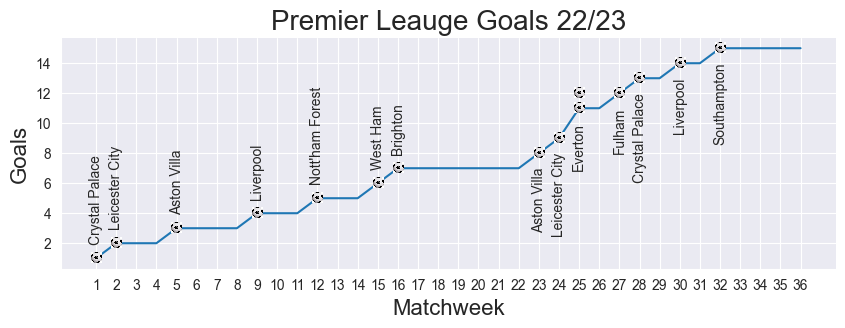

In [29]:
plt.figure(figsize = (10,3))
ax = sns.lineplot(data = df_player, x = df_player.index, y = 'cumulative_goals' ) 

plt.xticks(ticks = range(1,37))

img = plt.imread('football.png')

for index, row in df_player.loc[df_player['Gls'] > 0].iterrows():
    if index < 20:
        plt.annotate(row['Opponent'], (index, row['cumulative_goals']), rotation = 90, 
                     textcoords="offset points",xytext=(0,10), ha='center', va='bottom')
        for i in range(row['Gls']):
            ab = AnnotationBbox(OffsetImage(img, zoom = 0.008), (index, row['cumulative_goals']-i), frameon=False)
            ax.add_artist(ab)
    else:
        plt.annotate(row['Opponent'], (index, row['cumulative_goals']), rotation = 90, 
                     textcoords="offset points",xytext=(0,-10), ha='center', va='top')
        for i in range(row['Gls']):
            ab = AnnotationBbox(OffsetImage(img, zoom = 0.008), (index, row['cumulative_goals']+i), frameon=False)
            ax.add_artist(ab)

ax.set_xlabel('Matchweek', fontsize = 16)
ax.set_ylabel('Goals', fontsize = 16) 
ax.set_title('Premier Leauge Goals 22/23', fontsize = 20)
            
sns.despine()            
plt.savefig('martinelli_goals.png', dpi = 600, transparent = False, bbox_inches='tight', format = 'png')

plt.show()

### Plots player profiles as polar graphs

In [30]:
players = df_passing_possible['Player'].values

In [31]:
df_passing_extra = df_passing.copy()

df_passing_extra['KP%'] = df_passing_extra['KP'].div(df_passing_extra['Total_Att'])

df_passing_extra['PrgP%'] = df_passing_extra['PrgP'].div(df_passing_extra['Total_Att'])

df_passing_extra['1/3%'] = df_passing_extra['1/3'].div(df_passing_extra['Total_Att'])

61.27508854781583


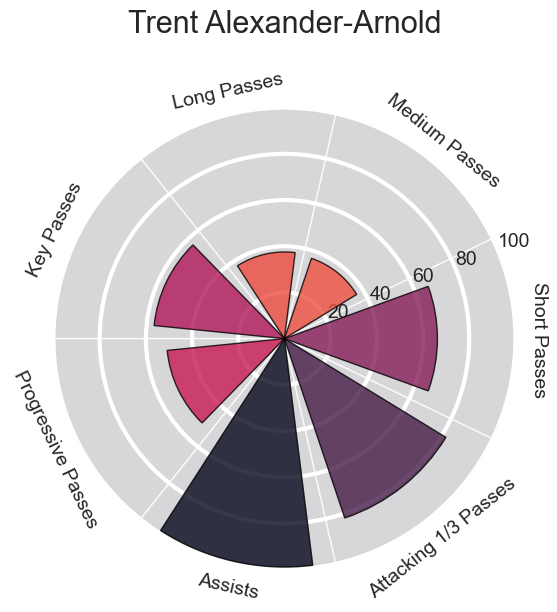

77.44195198740654


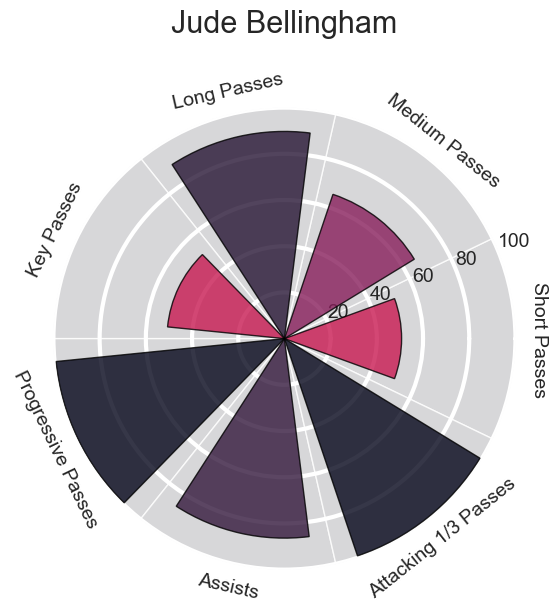

73.45139708776072


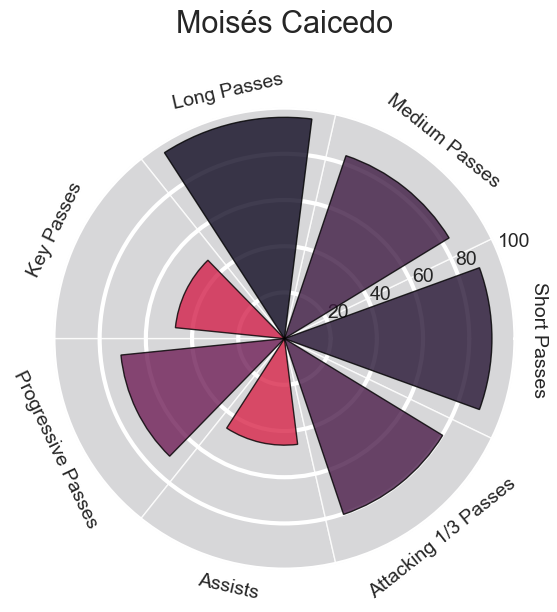

69.28768201495474


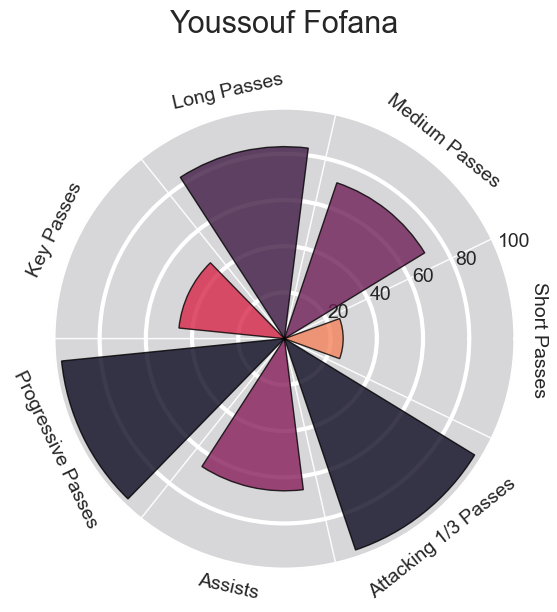

74.41951987406533


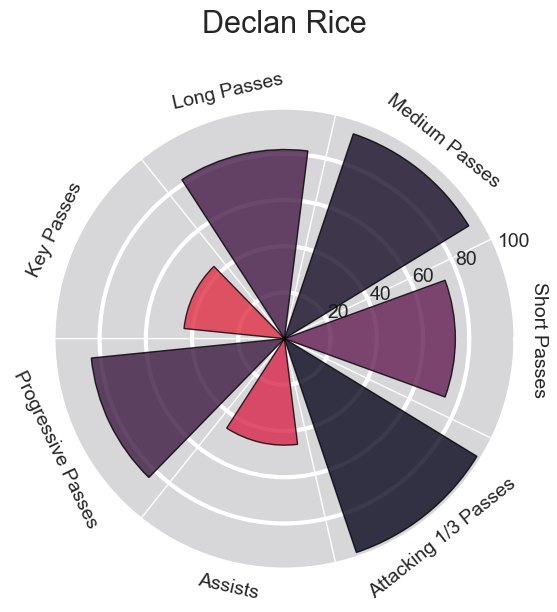

70.80676898858717


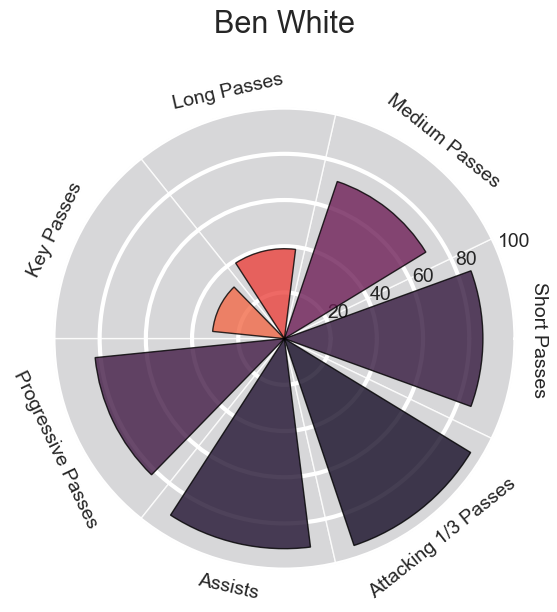

In [32]:
for player in players:

    player_profile = ['Short_Cmp%', 'Medium_Cmp%','Long_Cmp%', 'KP%', 'PrgP%', 'Ast', '1/3%']
    
    player_profile_labels = ['Short Passes', 'Medium Passes','Long Passes', 'Key Passes', 
                             'Progressive Passes', 'Assists', 'Attacking 1/3 Passes']
    
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6,6))

    indexes = list(range(0, len(player_profile)))
    width = 2*np.pi / len(player_profile)
    angles = [element * width for element in indexes]

    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(player_profile))

    bars_bg = ax.bar(x = angles, height=100, width=width, color='lightgrey',
           edgecolor='white', zorder=0, alpha=0.8)

    rankings = []
    df_player = df_passing_extra.loc[df_passing['Player'] == player]
    for stat in player_profile:
        rank = stats.percentileofscore(df_passing_extra.loc[(df_passing_extra['90s'] >= 6)
                                                            & (df_passing_extra['Pos'] != 'GK'),
                                                            stat], df_player[stat], kind='rank')[0]
        rankings.append(rank)
        
    colormap = plt.get_cmap("rocket_r")
    norm = Normalize(vmin=0, vmax=100)
    normalized_rankings = norm(rankings)

    colors = colormap(normalized_rankings)

    bars = ax.bar(x = angles, height=rankings, width=width-0.2, 
           edgecolor='black', zorder=1, alpha=0.8, color = colors)

    for angle, height, label in zip(angles, rankings, player_profile_labels):
        rotation_angle = np.degrees(angle)
        if angle < np.pi:
            rotation_angle -= 90
        elif angle == np.pi:
            rotation_angle -= 90
        else:
            rotation_angle += 90
        ax.text(angle, 110, label, 
                ha='center', va='center', 
                rotation=rotation_angle, rotation_mode='anchor', fontsize=14)
    ax.set_xticks([])

    ax.grid(color='white', lw=3)
    
    ax.set_title(label = player+'\n\n', fontsize = 22)
    
    plt.ylim(0, 100)
    
    plt.yticks(fontsize = 14)
    
    plt.savefig(player+'.png', dpi = 600, transparent = False, bbox_inches='tight', format = 'png')
    print(np.sum(rankings)/len(rankings))
    
    plt.show()
